# Lognormal mixture models 

See https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_2_General_Mixture_Models.ipynb

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy

from pomegranate import *

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

%load_ext watermark
%watermark -m -n -p numpy,scipy,pomegranate

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
numpy      : 1.20.3
scipy      : 1.6.3
pomegranate: 0.14.5

Compiler    : Clang 12.0.5 (clang-1205.0.22.9)
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit



## A simple example: Gaussian mixture models 

In [46]:
# https://www.sharpsightlabs.com/blog/numpy-random-normal/
X = np.concatenate([
    np.random.normal((7, 2), 1, size=(100, 2)),
    np.random.normal((2, 3), 1, size=(150, 2)),
    np.random.normal((7, 7), 1, size=(100, 2))
])

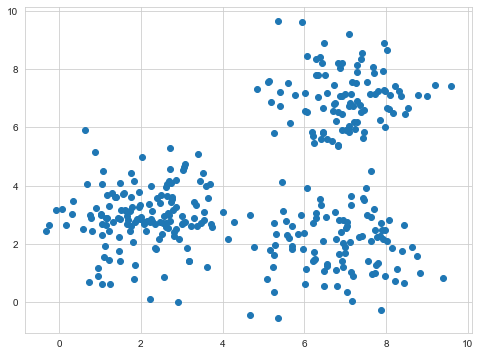

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [59]:
unmixed_model = MultivariateGaussianDistribution.from_samples(X)
mixture_model = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, 3, X)

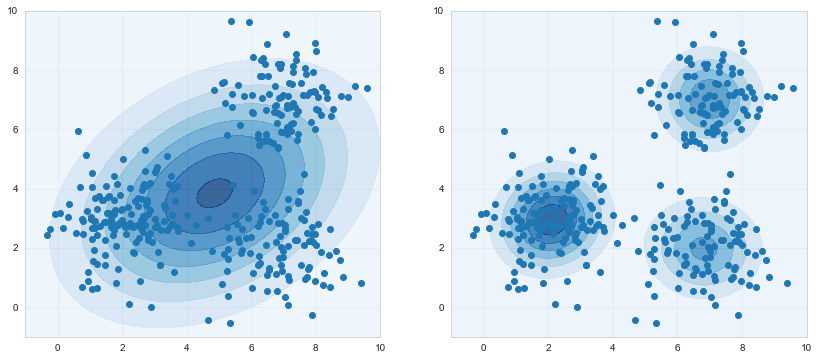

In [60]:
# Axis ranges
x = np.arange(-1, 10.1, .1)
y = np.arange(-1, 10.1, .1)

xx, yy = np.meshgrid(x, y)
x_ = np.array(list(zip(xx.flatten(), yy.flatten())))

p1 = unmixed_model.probability(x_).reshape(len(x), len(y))
p2 = mixture_model.probability(x_).reshape(len(x), len(y))

plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.contourf(xx, yy, p1, cmap="Blues", alpha=0.8)
plt.scatter(X[:,0], X[:,1])

plt.subplot(122)
plt.contourf(xx, yy, p2, cmap="Blues", alpha=0.8)
plt.scatter(X[:,0], X[:,1])

plt.show()

## A more complex example: independent component mixture models 

In [96]:
# Generate stats for 250 segments.

# Mean
mu = np.random.normal(7, 1, size=250)

# Standard deviation
std = np.random.lognormal(-2.0, 0.4, size=250)
std[::2] += 0.3 # Bias every other element

# Duration
dur = np.random.exponential(250, size=250)
dur[::2] -= 140
dur = np.abs(dur)

data = np.concatenate([np.random.normal(mu_, std_, int(t)) for mu_, std_, t in zip(mu, std, dur)])

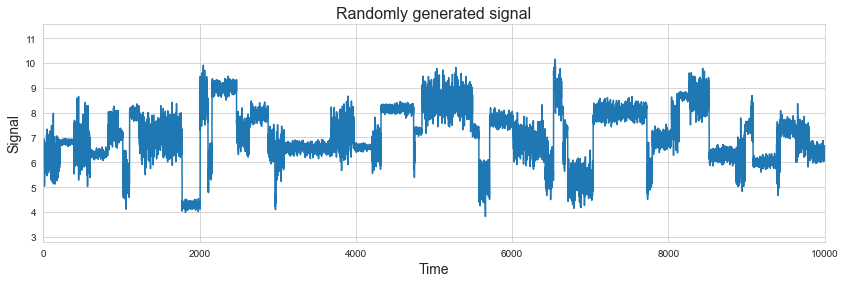

In [97]:
plt.figure(figsize=(14, 4))
plt.title("Randomly generated signal", fontsize=16)
plt.plot(data)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Signal", fontsize=14)
plt.xlim(0, 10000)
plt.show()

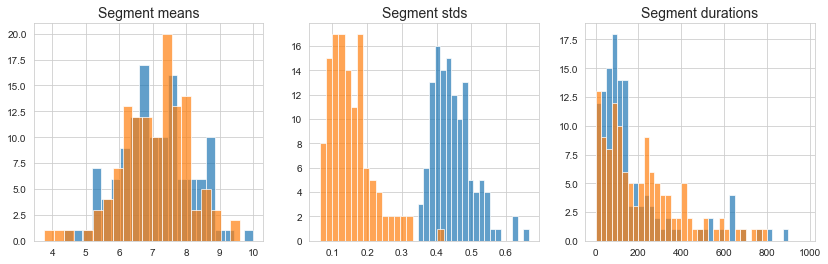

In [98]:
plt.figure(figsize=(14, 4))

# The ::2 and 1::2 are the two different classes

plt.subplot(131)
plt.title("Segment means", fontsize=14)
plt.hist(mu[::2], bins=20, alpha=0.7)
plt.hist(mu[1::2], bins=20, alpha=0.7)

plt.subplot(132)
plt.title("Segment stds", fontsize=14)
plt.hist(std[::2], bins=20, alpha=0.7)
plt.hist(std[1::2], bins=20, alpha=0.7)

plt.subplot(133)
plt.title("Segment durations", fontsize=14)
plt.hist(dur[::2], bins=np.arange(0, 1000, 25), alpha=0.7)
plt.hist(dur[1::2], bins=np.arange(0, 1000, 25), alpha=0.7)

plt.show()

In [99]:
X = np.array([mu, std, dur]).T.copy()

model = GeneralMixtureModel.from_samples([NormalDistribution, LogNormalDistribution, ExponentialDistribution], 2, X)
model

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "NormalDistribution",
                        "parameters" : [
                            7.045497784800804,
                            0.9826635052335613
                        ],
                        "frozen" : false
                    },
                    {
                        "class" : "Distribution",
                        "name" : "LogNormalDistribution",
                        "parameters" : [
                            -1.9658542105399666,
                            0.35317670652242583
                        ],
                        "frozen" : false
                    },
                    {
                        "class" : "Distribution",


## Another example

In [124]:
rng = np.random.default_rng(42)
comp1 = rng.lognormal(2.6, 1.0, 5000)
comp2 = rng.lognormal(0.4, 0.6, 2500)
both = np.hstack((comp1, comp2))
np.random.shuffle(both)

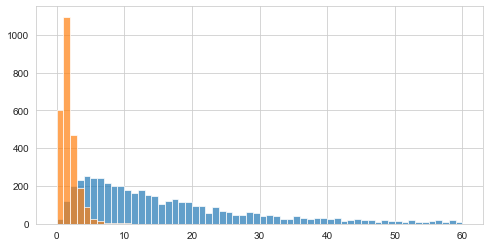

In [125]:
plt.figure(figsize=(8, 4))
plt.hist(comp1, bins=60, range=[0, 60], alpha=0.7)
plt.hist(comp2, bins=60, range=[0, 60], alpha=0.7)
plt.show()

In [126]:
X = np.array([both]).T.copy()
model = GeneralMixtureModel.from_samples([LogNormalDistribution, LogNormalDistribution], 2, X)
model

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "LogNormalDistribution",
            "parameters" : [
                0.43855489864846264,
                0.6168948061587589
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "LogNormalDistribution",
            "parameters" : [
                2.6194344166966683,
                0.9741918941499477
            ],
            "frozen" : false
        }
    ],
    "weights" : [
        0.34918919990745917,
        0.6508108000925409
    ]
}